In [15]:
import logging
from itertools import product
import matplotlib.pyplot as plt
from os.path import join, abspath
from itertools import combinations
from dataclasses import dataclass

@dataclass(frozen=True)
class GenBank:
    sid: str
    organism: str
    seq: str

def get_code_dir():
    return abspath("")

def read_genbank_no_bio(sid: str) -> GenBank: 
    path = path = join(get_code_dir(), "data", f"{sid}.genbank")
    file = open(path)
    l_file = file.readlines()
    file.close()
       
    l_seq = []
    found_origin = 0
    for line in l_file:
        if 'ORGANISM' in line:
            organism = ' '.join(line.split()[1:])
        if found_origin:
            l_seq.append(line)
        if 'ORIGIN' in line:
            found_origin = 1

    seq = ''
    for line in l_seq:
        seq += ''.join(line.strip().split()[1:]).upper()
    seq = seq.strip()
    return GenBank(sid=sid, organism=organism, seq=seq) 


def slice_(line, width):
    windows = [
        (i, line[i : i + width])
        for j in range(0, width)
        for i in range(j, len(line) - width + 1, width)
    ]

    dictionary = {}
    for i, window in windows:
        if window not in dictionary:
            dictionary[window] = [i]
        else:
            dictionary[window].append(i)
    return {key: sorted(value) for key, value in dictionary.items()}


def match(lhs, rhs, width):
    lhs_slice = slice_(lhs, width)
    rhs_slice = slice_(rhs, width)
    dictionary = {
        key: (value, rhs_slice[key])
        for key, value in lhs_slice.items()
        if key in rhs_slice
    }
    lhs_common, rhs_common = zip(*dictionary.values())
    return match_outer(lhs_common, rhs_common)


def match_outer(lhs, rhs):
    inner_matches = [match_inner(a, b) for a, b in zip(lhs, rhs)]
    lhs_inner, rhs_inner = zip(*inner_matches)
    return sum(lhs_inner, []), sum(rhs_inner, [])


def match_inner(lhs, rhs):
    combinations = product(lhs, rhs)
    a, b = zip(*combinations)
    return list(a), list(b)


def plot(x, y, lablex, labley, width):
    fig, ax = plt.subplots()
    ax.scatter(x, y)
    ax.set_xlabel(lablex)
    ax.set_ylabel(labley)
    ax.set_title(f"Dot plot with window size {width}")
    plt.show()



In [16]:
logging.basicConfig(level=logging.INFO)
width = 10

human = read_genbank_no_bio("P00846")
african_elephant = read_genbank_no_bio("Q9TA24")
indian_elephant = read_genbank_no_bio("Q2I3G9")
chimpanzee = read_genbank_no_bio("Q9T9W0")
orangutan = read_genbank_no_bio("Q95A26")

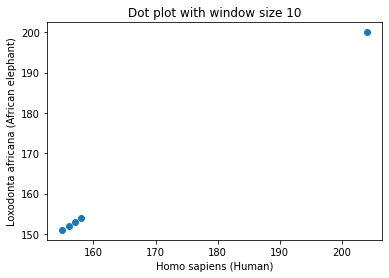

(204, 200)


In [18]:
(x, y) = match(human.seq, african_elephant.seq, width)
plot(x, y, human.organism, african_elephant.organism, width)
print(sorted(zip(x,y))[4])


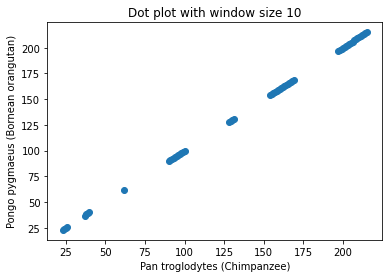

59


In [19]:
  (x, y) = match(chimpanzee.seq, orangutan.seq, width)
  plot(x, y, chimpanzee.organism, orangutan.organism, width)
  print(f"Number of matches: {len(x)}")

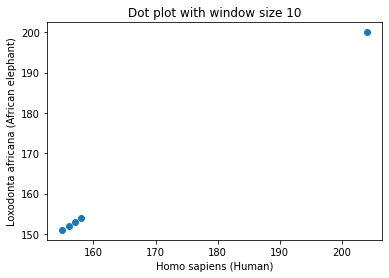

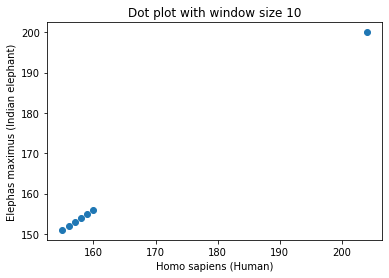

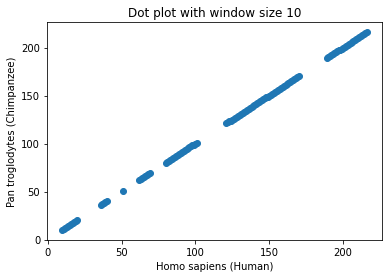

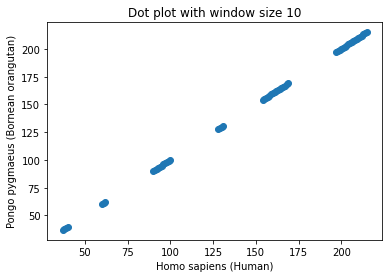

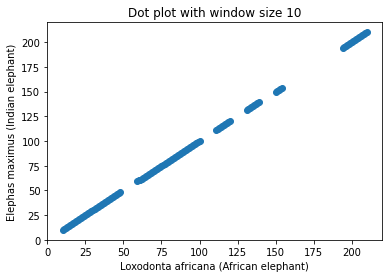

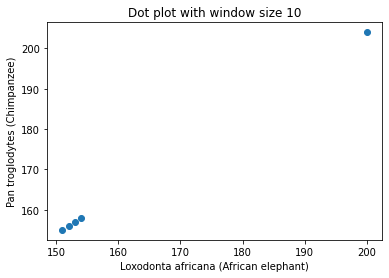

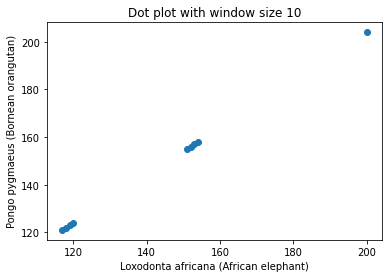

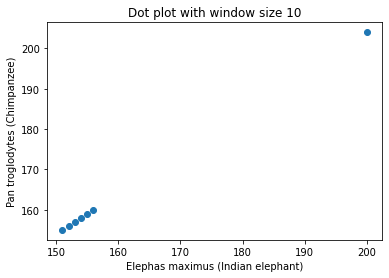

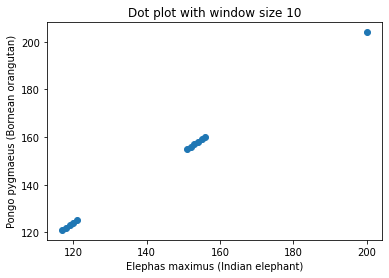

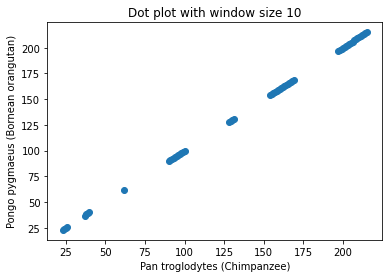

Total matches: 408


In [20]:
organism_pairs = combinations([human, african_elephant, indian_elephant, chimpanzee, orangutan], 2)
total_matches = 0
for a, b in organism_pairs:
    (x, y) = match(a.seq, b.seq, width)
    plot(x, y, a.organism, b.organism, width)
    total_matches += len(x)
print(f"Total matches: {total_matches}")